In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

## Ejemplo 2

Usted es el consultor de una empresa de tecnología que está considerando lanzar una campaña publicitaria para un nuevo producto. El departamento de finanzas le ha indicado que el presupuesto máximo para invertir en publicidad esta topado a 25000 pesos. Se conoce que los dos medios más importantes por los cuales se impactan a los clientes son las redes sociales y las campañas en streaming de video. El costo promedio de un anuncio en las redes sociales es de 25 pesos y en el caso del video es de 200 pesos. 

Un reporte estadístico a concluido que el retorno que se recibe por la inversión en anuncios por estos medios se comporta de la siguiente forma: 

$$retorno(s,v)= 7s^\frac{3}{4}v^\frac{1}{4}$$

Donde s y v representan los anuncios en las redes sociales y las plataformas video respectivamente. 

<br>

a) Encuentre la cantidad adecuada de anuncios que se deben realizar en cada medio para obtener un rendimiento máximo con el presupuesto que se cuenta.


In [ ]:
#Datos del problema

cost_rsocial = 25
cost_svideo = 200
presupuesto = 25000

In [ ]:
# Calculo de las restricciones mínima y máxima
rsocial_min = 0
rsocial_max = presupuesto / cost_rsocial

svideo_min = 0
svideo_max = presupuesto / cost_svideo

In [ ]:
rsocial_max

1000.0

In [ ]:
svideo_max

125.0

### Presentación gráfica de las restricciones de la función 

El gasto total del presuesto se define como: 
$$ presupuesto = 25s + 200v $$
<br>
$$  25s + 200v = 25000 $$
Siendo $s$ la cantidad de anuncios en las plataformas de redes sociales y $v$ la cantidad de anuncios correspondientes a las campañas de streaming.

In [ ]:
def n_social(n_video, presupuesto):
    return (presupuesto - 200 * n_video) / 25

In [ ]:
def n_video(n_social, presupuesto):
    return (presupuesto - 25 * n_social) / 200

### Posibles formas de invertir el presupuesto:





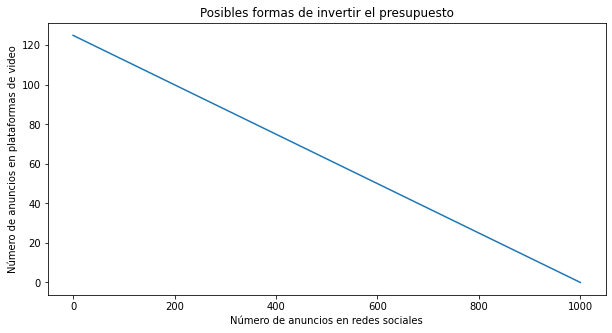

In [ ]:
social_x = np.linspace(rsocial_min, rsocial_max, 100)
video_y = n_video(social_x, presupuesto)

plt.figure(figsize=(10,5))
plt.plot(social_x, video_y)
plt.xlabel('Número de anuncios en redes sociales')
plt.ylabel('Número de anuncios en plataformas de video')
plt.title('Posibles formas de invertir el presupuesto')
plt.show()

## Gráfica de la función de retorno con restricciones 

In [ ]:
s, v = symbols("s v")
retorno = 7*s**(3/4)*v**(1/4)
retorno

7*s**0.75*v**0.25

In [ ]:
f_retorno = lambdify('s,v',retorno)

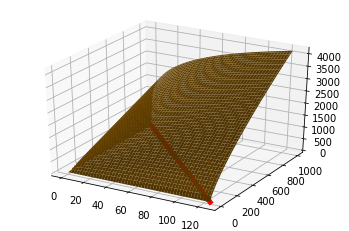

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
social_axis = np.linspace(rsocial_min, rsocial_max, 100)
tv_axis = np.linspace(svideo_min, svideo_max, 100)
social_grid, tv_grid = np.meshgrid(social_axis, tv_axis)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(tv_grid, social_grid, f_retorno(social_grid, tv_grid),color = 'orange')
ax.plot(video_y, social_x, linewidth = 5, color = 'red')
plt.show()

## Generado nuestro mapa de color y de contorno del gradiente

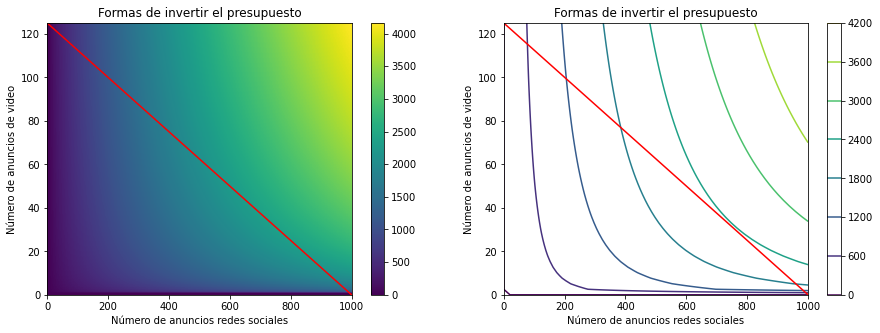

In [ ]:
fig, (ax_l, ax_r) = plt.subplots(1, 2, figsize = (15, 5))


social_axis = np.linspace(rsocial_min, rsocial_max, 100)
tv_axis = np.linspace(svideo_max, svideo_min, 100)
social_grid, tv_grid = np.meshgrid(social_axis, tv_axis)
    
im = ax_l.imshow(f_retorno(social_grid, tv_grid), aspect = 'auto', extent=[rsocial_min, rsocial_max, svideo_min, svideo_max])
ax_l.plot(social_axis, n_video(social_axis, 25000), 'r')
ax_l.set_xlabel('Número de anuncios redes sociales')
ax_l.set_ylabel('Número de anuncios de video')
ax_l.set_title('Formas de invertir el presupuesto')


# The contours are showing how the intersection looks like

social_axis = np.linspace(rsocial_min, rsocial_max)
tv_axis = np.linspace(svideo_min, svideo_max)
social_grid, tv_grid = np.meshgrid(social_axis, tv_axis)

im2 = ax_r.contour(f_retorno(social_grid,tv_grid), extent=[rsocial_min, rsocial_max, svideo_min, svideo_max])
ax_r.plot(social_axis, n_video(social_axis, 25000), 'r')
ax_r.set_xlabel('Número de anuncios redes sociales')
ax_r.set_ylabel('Número de anuncios de video')
ax_r.set_title('Formas de invertir el presupuesto')

plt.colorbar(im,ax=ax_l)
plt.colorbar(im2,ax=ax_r)

plt.show()

### Apicando en multiplicador de Lagrange

In [ ]:
s, l = symbols('s l')
f1x = retorno.diff(s)
f1y = retorno.diff(v)

In [ ]:
funcion_2 = 25*s + 200*v - 25000
f2x = funcion_2.diff(s)
f2y = funcion_2.diff(v)

In [ ]:
DL = np.array([
            f1x - l*f2x,
            f1y - l*f2y,
            - funcion_2
        ])

In [ ]:
solve([Eq(DL[0],0),
       Eq(DL[1],0),
       Eq(DL[2],0)],[s,v,l], simplify=False)

[(750.000000000000, 31.2500000000000, 0.0948782103790337)]